### Importing Packages / Libraries

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tasks: 

# 1. Data Preprocessing

### Load the cereal dataset into a pandas DataFrame.

In [399]:
dataset = pd.read_csv("C:\\Users\\dhuri\\Downloads\\Cereals.csv")

In [400]:
dataset.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [401]:
dataset.shape

(77, 16)

In [402]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


### Remove any irrelevant variables (e.g., 'name') that are not required for dimensionality reduction.

In [403]:
df = dataset[dataset.columns[dataset.columns!='name']]

In [404]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


### Handle any missing values or outliers in the dataset, if applicable.

In [405]:
df.isnull().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [406]:
missing_values = df.isnull().any(axis=1)

In [407]:
missing_rows = df[missing_values]

In [408]:
print("Number of rows with missing_values: ", len(missing_rows))

Number of rows with missing_values:  3


In [409]:
missing_rows

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
20,N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
57,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


### Plotting Boxplot for missing value columns to check for any outliers before imputing

<AxesSubplot:xlabel='carbo'>

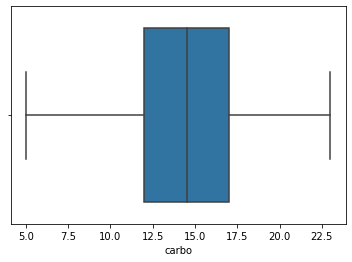

In [410]:
sns.boxplot(x='carbo',data=df)
# Normally Distributed

<AxesSubplot:xlabel='carbo', ylabel='Count'>

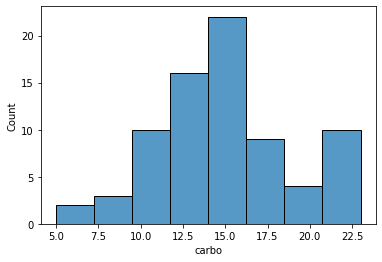

In [411]:
sns.histplot(x='carbo',data=df)

<AxesSubplot:xlabel='sugars'>

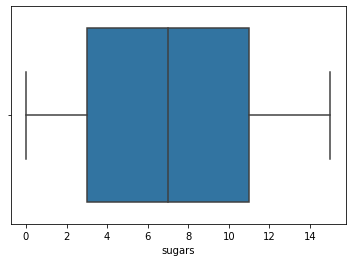

In [412]:
sns.boxplot(x='sugars',data=df)
# Normally Distributed

<AxesSubplot:xlabel='sugars', ylabel='Count'>

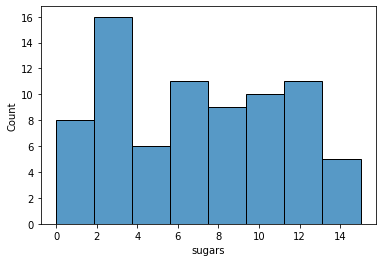

In [413]:
sns.histplot(x='sugars',data=df)

<AxesSubplot:xlabel='potass'>

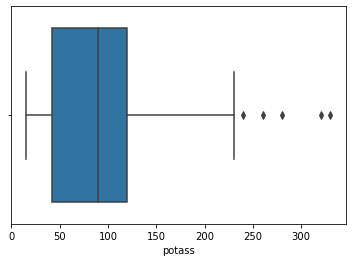

In [414]:
sns.boxplot(x='potass',data=df)
# Not Normally Distributed
# It has some outliers, so we will impute the NULL values with median

<AxesSubplot:xlabel='potass', ylabel='Count'>

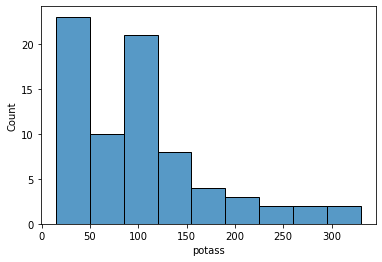

In [415]:
sns.histplot(x='potass',data=df)

### Imputing Missing Values with Mean for 'carbo' and 'sugars' column

In [416]:
df.columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [417]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [418]:
sugar_mean = df['sugars'].mean()

In [419]:
df['sugars'].fillna(sugar_mean,inplace=True)

C:\Users\dhuri\AppData\Local\Temp\ipykernel_24752\2065871417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sugars'].fillna(sugar_mean,inplace=True)


In [420]:
df['carbo'].fillna(df['carbo'].mean(),inplace=True)

C:\Users\dhuri\AppData\Local\Temp\ipykernel_24752\4211680233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carbo'].fillna(df['carbo'].mean(),inplace=True)


In [421]:
df['potass'].fillna(df['potass'].mean(),inplace=True)

C:\Users\dhuri\AppData\Local\Temp\ipykernel_24752\3384779985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['potass'].fillna(df['potass'].mean(),inplace=True)


In [422]:
# Successfully imputed the NULL values
df.isnull().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [423]:
print("Number of rows before dropping missing values: ", len(dataset))
print("Number of missing value rows: ", len(missing_rows))
print("Number of rows after dropping missing values: ", len(df1))
print("Number of rows after imputing missing values with median: ", len(df))

Number of rows before dropping missing values:  77
Number of missing value rows:  3
Number of rows after dropping missing values:  74
Number of rows after imputing missing values with median:  77


### Convert categorical variables (e.g., 'mfr', 'type') into numerical representations, if needed.

In [424]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
df['mfr'] = labelencoder_x.fit_transform(df['mfr'])
df['type'] = labelencoder_x.fit_transform(df['type'])

C:\Users\dhuri\AppData\Local\Temp\ipykernel_24752\203108876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mfr'] = labelencoder_x.fit_transform(df['mfr'])
C:\Users\dhuri\AppData\Local\Temp\ipykernel_24752\203108876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = labelencoder_x.fit_transform(df['type'])


In [425]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,3,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,5,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,2,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,6,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [426]:
df['mfr'].unique()

array([3, 5, 2, 6, 1, 4, 0])

In [427]:
df['type'].unique()

array([0, 1])

### 2. Feature Scaling
- Normalize or standardize the numerical features in the dataset to ensure all variables are on a similar scale. Choose an appropriate scaling technique based on the characteristics of the dataset.

In [428]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,3,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,5,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,2,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,6,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [429]:
#Storing all numerical columns from df to variable 'x'
numerical_columns = df.iloc[:,2:14]

In [430]:
numerical_col_names = numerical_columns.columns

In [431]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_col_names])

In [432]:
scaled_data = pd.DataFrame(scaled_data,columns=numerical_col_names)

In [433]:
scaled_data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.542013,-0.237495,2.627053,-0.14627,0.957813,-0.198067,-2.123870
1,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.764055,0.225316,0.526376,-1.27255,0.957813,-0.198067,0.774053
2,-1.905397,1.337319,-0.012988,1.204578,2.892113,-2.023374,-0.468901,3.206550,-0.14627,0.957813,-0.198067,-2.123870
3,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.764055,-1.625929,3.351425,-0.14627,0.957813,-0.198067,-1.388576
4,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.208138,0.225316,0.000000,-0.14627,0.957813,-0.198067,-0.307262


# 3. Dimensionality Reduction Techniques
- Apply Principal Component Analysis (PCA) to the dataset to reduce the dimensionality.
- Implement Linear Discriminant Analysis (LDA) to perform dimensionality reduction, considering the target variable (e.g., 'rating') if it is available.
- Optionally, explore and apply other dimensionality reduction techniques such as t-SNE or Factor Analysis.

In [434]:
from sklearn.decomposition import PCA

In [435]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,3,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,5,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,2,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,6,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [436]:
#Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

In [437]:
#Evaluation and Interpretation
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

Explained Variance Ratio:  [0.55515966 0.37243857]


# Evaluation and Interpretation
- Assess the explained variance ratio for PCA to understand how much information is retained after dimensionality reduction.
- Evaluate the impact of dimensionality reduction on the performance of a specific task (e.g., classification or regression) using appropriate evaluation metrics.
- Interpret the reduced dimensions and identify the most influential features contributing to the variability in the dataset.

# Data Preprocessing:

### Handling Missing Values:

- Identified missing values in columns: 'carbo', 'sugars', and 'potass'.
- Imputed missing values in 'carbo' and 'sugars' columns with mean values.
- Imputed missing values in the 'potass' column with the mean value.

### Label Encoding:

- Converted categorical variables 'mfr' and 'type' into numerical representations using label encoding.

### Feature Scaling:
- Standardized numerical features using StandardScaler to ensure all variables are on a similar scale.

## Dimensionality Reduction:

### Principal Component Analysis (PCA):
- Applied PCA to reduce the dimensionality of the dataset to 2 principal components.
- Explained Variance Ratio after PCA: [0.55515966, 0.37243857]

### Evaluation and Interpretation:

- Explained Variance Ratio: The first principal component explains approximately 55.5% of the variance in the data, and the second principal component explains about 37.2% of the variance. Together, these two components retain around 92.7% of the total variance in the original data.

# Reporting and Discussion

- Summarize the findings of the dimensionality reduction analysis.
- Discuss the advantages and limitations of the performed dimensionality reduction techniques.
- Encourage students to think about the potential applications of dimensionality reduction in real-world scenarios.

In this analysis, Principal Component Analysis (PCA) was applied to the cereal dataset, reducing the dimensionality from the original feature space to 2 principal components. The two principal components explain approximately 92.75% of the total variance in the data. This means that most of the variability in the dataset can be captured by these two principal components.

# Advantages and Limitations of Dimensionality Reduction Techniques:

### Advantages:

- Simplifies Complexity: Dimensionality reduction techniques like PCA simplify complex datasets, making them easier to understand and work with.
- Computational Efficiency: Reduced dimensions lead to faster training times in machine learning algorithms.
- Visualization: Data in lower dimensions can often be visualized more easily, aiding in human interpretation.
- Noise Reduction: By focusing on the most significant features, noise and irrelevant information can be filtered out.
    
### Limitations:

- Information Loss: Dimensionality reduction leads to information loss. Depending on the number of dimensions reduced, this loss can be substantial.
- Interpretability: Interpreting reduced features might be challenging as they don't directly correspond to original features.
- Parameters: Some techniques, like PCA, involve parameters like the number of components. Choosing an appropriate number of components can be non-trivial.
- Assumptions: Techniques like PCA assume that data is linear. If the underlying data structure is non-linear, other techniques like t-SNE might be more appropriate but come with their own set of challenges.